******Qantitative Risk Managment****** | *(Self-Project)*

*Project Overview:*
The objective of this project is to analyze and manage the risks associated with a financial portfolio using quantitative methods. The project will involve measuring various risk metrics, performing stress testing, scenario analysis, and constructing risk-adjusted portfolios. It will also explore techniques for managing and mitigating risk.

*Objectives:*

Risk Measurement: Calculate and analyze key risk metrics for a financial portfolio, such as Value at Risk (VaR), Expected Shortfall (ES), and beta.

Stress Testing and Scenario Analysis: Evaluate the impact of extreme market events on the portfolio.

Portfolio Optimization: Construct a risk-adjusted portfolio using techniques like Mean-Variance Optimization or Black-Litterman model.

Risk Mitigation Strategies: Explore strategies like diversification, hedging, and dynamic rebalancing to mitigate risks.

Visualization: Create visualizations to illustrate risk metrics, stress test results, and portfolio performance.

In [1]:
import yfinance as yf

# Download historical price data for a portfolio of assets
assets = ['AAPL', 'GOOGL', 'MSFT', 'SPY', 'TLT']
data = yf.download(assets, start='2010-01-01', end='2023-01-01')['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [2]:
import numpy as np
from scipy.stats import norm

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate portfolio weights (equal-weighted for simplicity)
weights = np.array([0.2] * len(assets))

# Calculate portfolio mean return and covariance matrix
portfolio_mean = np.dot(weights, returns.mean())
portfolio_cov = np.dot(weights.T, np.dot(returns.cov(), weights))

# Calculate Value at Risk (VaR) at 95% confidence level
confidence_level = 0.95
z_score = norm.ppf(confidence_level)
portfolio_var = portfolio_mean - z_score * np.sqrt(portfolio_cov)

# Calculate Expected Shortfall (ES)
portfolio_es = portfolio_mean - (norm.pdf(z_score) / (1 - confidence_level)) * np.sqrt(portfolio_cov)


In [3]:
# Example stress test: Assume a 20% drop in equity prices
stress_returns = returns.copy()
stress_returns[['AAPL', 'GOOGL', 'MSFT']] *= 0.8  # Simulate 20% drop

# Recalculate portfolio metrics under stress scenario
stress_portfolio_mean = np.dot(weights, stress_returns.mean())
stress_portfolio_var = stress_portfolio_mean - z_score * np.sqrt(np.dot(weights.T, np.dot(stress_returns.cov(), weights)))

print(f'Stress Test VaR: {stress_portfolio_var}')


Stress Test VaR: -0.013668932534552213


In [4]:
from scipy.optimize import minimize

# Define the objective function for Mean-Variance Optimization
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Perform optimization
optimized_result = minimize(portfolio_volatility, weights, args=(returns.cov(),), method='SLSQP', bounds=[(0, 1)]*len(weights), constraints={'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
optimized_weights = optimized_result.x

print(f'Optimized Portfolio Weights: {optimized_weights}')


Optimized Portfolio Weights: [0.         0.         0.         0.44749543 0.55250457]


In [5]:
# Example of portfolio diversification
# Calculate the correlation matrix to assess diversification potential
correlation_matrix = returns.corr()

print('Correlation Matrix:')
print(correlation_matrix)


Correlation Matrix:
Ticker      AAPL     GOOGL      MSFT       SPY       TLT
Ticker                                                  
AAPL    1.000000  0.564578  0.597662  0.689417 -0.220167
GOOGL   0.564578  1.000000  0.651818  0.707343 -0.212608
MSFT    0.597662  0.651818  1.000000  0.764195 -0.221593
SPY     0.689417  0.707343  0.764195  1.000000 -0.376063
TLT    -0.220167 -0.212608 -0.221593 -0.376063  1.000000


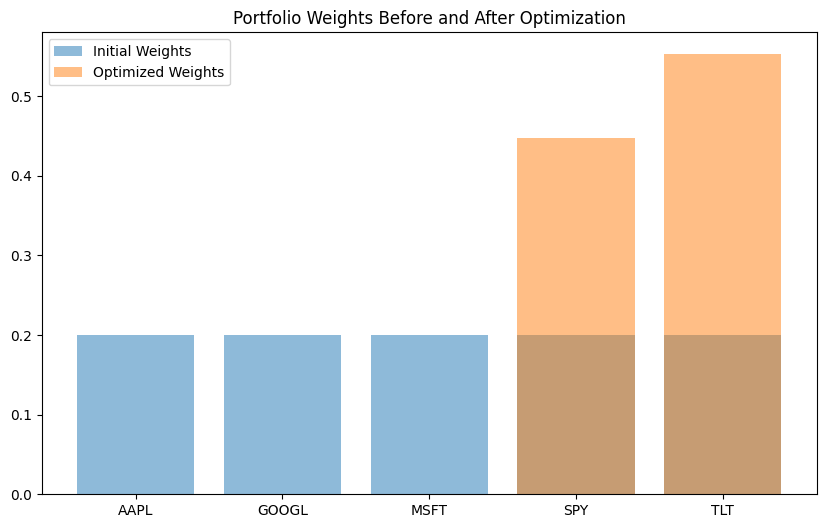

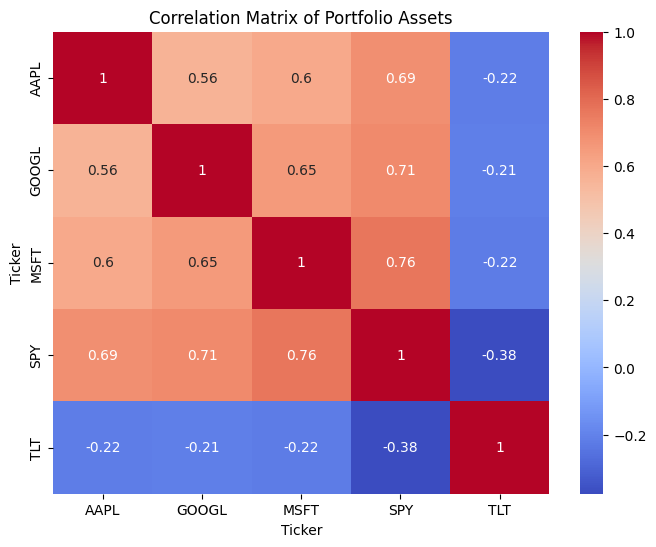

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the portfolio weights before and after optimization
plt.figure(figsize=(10, 6))
plt.bar(assets, weights, alpha=0.5, label='Initial Weights')
plt.bar(assets, optimized_weights, alpha=0.5, label='Optimized Weights')
plt.title('Portfolio Weights Before and After Optimization')
plt.legend()
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Portfolio Assets')
plt.show()
